# Point Spread Function (PSF) generation

Having a realsiting model for the PSF is important for the success of any deconvolution/image fusion task. Ideally one would always have a measured PSF available, but most often that is not the case. Therefore a theoretical PSF needs to be generated. Another alternative would be to use blind deconvolution -- but also in such case, theoretical PSF is needed as a starting parameter. 

In [5]:
%matplotlib inline
from ipywidgets import interact, fixed

import numpy as np
from supertomo.psf import psfgen as psf
import supertomo.ui.plots.image as implot



def show_orthogonal_plot(image, x, y, z):
    figure = implot.create_axial_views_plot(image, x, y, z)

## Diffraction limited PSFs

The theoretical PSF estimation in SuperTomo is based on the excellent Python implementation of several theoretical PSF models by [Christoph Gohlke](https://www.lfd.uci.edu/~gohlke/). Here a PSF is generated for a confocal system with 100x/1.4 oil immersion objective and small 0.5 Au pinhole. 

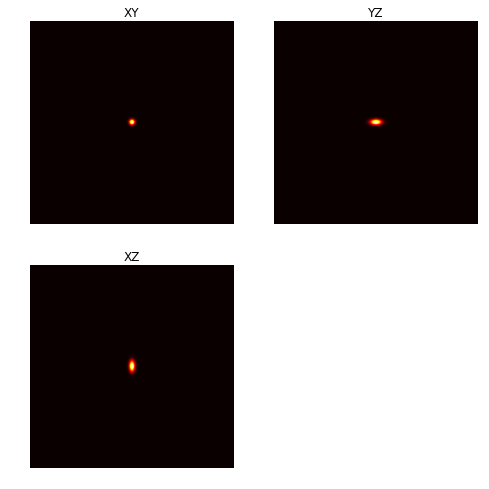

In [6]:
test_psf = psf.PSF(psf.GAUSSIAN | psf.CONFOCAL, ex_wavelen=488, em_wavelen=550, num_aperture=1.4, refr_index=1.51, pinhole_radius=.5, magnification=100.0)
psf_image = test_psf.volume()
z_len, y_len, x_len = image.shape

show_orthogonal_plot(psf_image, x_len/2, y_len/2, z_len/2)

## STED PSF

In STED PSF the regular confocal PSF gets modified by the depletion donut. The theoretical model is described in:

*Zanella, R. et al., 2013. Towards real-time image deconvolution: application to confocal and STED microscopy. Scientific reports, 3, p.2523. Available at: http://www.nature.com/srep/2013/130828/srep02523/full/srep02523.htm.*



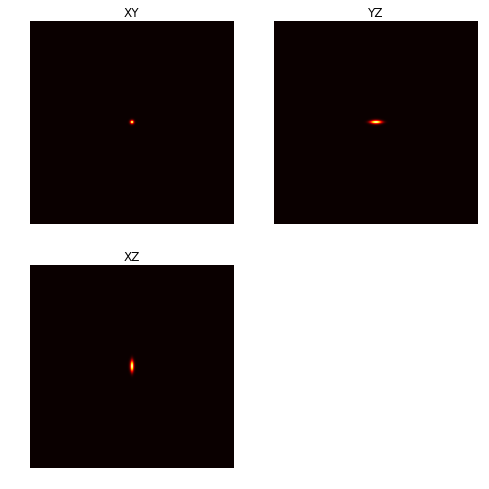

In [7]:
test_psf.sted_correction()
sted_psf_image = test_psf.volume()

show_orthogonal_plot(sted_psf_image, x_len/2, y_len/2, z_len/2)